In [1]:
from cvxpy import *
import gurobipy

<img src="ex14.png">

In [2]:
problem = [] # we split our linear problem into several
candidates = [] # minimum value for each split

x1 = [Variable(), Variable(), Variable(), Variable()]
x2 = [Variable(), Variable(), Variable(), Variable()]

# x_1 < -2 & x2 < 0
constraints = [ -x1[0] - 2 - x2[0] <= 5,
                x1[0] < -2,
                x2[0] < 0]

obj = Minimize(2 * x1[0] + 3 * (-x2[0] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

# x_1 < -2 & x2 >= 0
constraints = [ -x1[1] - 2 + x2[1] <= 5,
                x1[1] < -2,
                x2[1] >= 0,
                x2[1] < 10]

obj = Minimize(2 * x1[1] + 3 * (-x2[1] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

# x_1 >= -2 & x2 < 0
constraints = [ x1[2] + 2 - x2[2] <= 5,
                x1[2] >= -2,
                x2[2] < 0]

obj = Minimize(2 * x1[2] +3 * (-x2[2] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

# x_1 >= -2 & x2 >= 0
constraints = [ x1[3] + 2 + x2[3] <= 5,
                x1[3] >= -2,
                x2[3] >= 0]

obj = Minimize(2 * x1[3] + 3 * (-x2[3] + 10))
prob = Problem(obj, constraints)
candidates.append(prob.solve(solver=CVXOPT))
problem.append(prob)

idx = candidates.index(min(candidates))
print "optimal value:", candidates[idx]
print "x_1: ", x1[idx].value, "; x_2: ", x2[idx].value

optimal value: 10.9999999686
x_1:  -1.99999997883 ; x_2:  5.00000002459


Exactly one LP implementation, based on the fact:
$$\min{ \left|x - c\right|} \equiv \min{ (x_1 + x_2)},$$
where:
$$x_1 - x_2 = x - c; x_1, x_2 \geq 0$$

In [63]:
x2 = Variable()
x1 = Variable()

x2_1, x2_2 = [Variable(), Variable()]
x2_1z, x2_2z = [Variable(), Variable()]
x1_1, x1_2 = [Variable(), Variable()]

constraints = [ x2_1 - x2_2 == x2 - 10,
                x1_1 - x1_2 == x1 + 2,
                x2_1z - x2_2z == x2,
                x2_1 >= 0,
                x2_2 >= 0,
                x1_1 >= 0,
                x1_2 >= 0,
                x2_1z >= 0,
                x2_2z >= 0,
                x1_1 + x1_2 + x2_1z + x2_2z <= 5]

obj = Minimize(2 * x1 + 3 * (x2_1 + x2_2))
prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)
print "optimal value:", res

optimal value: 10.9999999637


this one also could be solved within the `abs` func:

In [4]:
import cvxpy

x1 = Variable()
x2 = Variable()

constraints = [ cvxpy.abs(x1 + 2) + cvxpy.abs(x2) <= 5 ]

obj = Minimize(2 * x1 + 3*cvxpy.abs(x2 - 10))
prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)
print "optimal value:", res
print "x_1: ", x1.value, "; x_2: ", x2.value

optimal value: 10.9999999792
x_1:  -2.00000010026 ; x_2:  4.99999992744


<img src="ex18.png">

We will just try to minimize L1 error:
$$Err(p) = ||ap - I^*||_1$$

 value:  32.5449493298


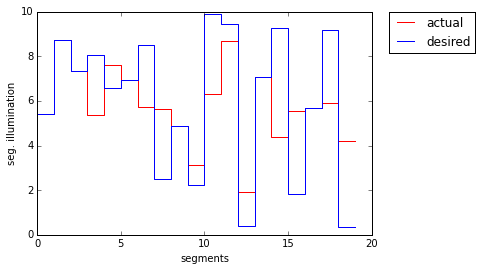

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

np.random.seed(42)

n, m = 20, 50 # segments, lamps
a = np.random.rand(n, m) * 10 # matrix of illumination coefficients

p = Variable(m) # lamp powers vector

Iast = (np.random.rand(n) * 10).reshape((n, 1)) # desired illumination

constraints = [ (p[i] >= 0) for i in xrange(m) ]

obj = Minimize(cvxpy.norm(a * p - Iast, 1))
prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)

print " value: ", res
values = np.array([np.float64(i) for i in p.value])
values = a.dot(values)
rng = range(len(values))

plt.step(rng, values,'r', label='actual')
plt.step(rng, Iast,'b', label='desired')

plt.xlabel('segments')
plt.ylabel('seg. illumination')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The reason we don't get a perfect solution for $m \geq n$ is that $p_i$ should be positive.

<img src="ex115.png">

1. Case 'a':
  * $(9-1.2)A + (8-0.9)B$ - Daily profit
  * A - First product quantity
  * B - Second product quantity
  * $A * \frac{1}{4} + B * \frac{1}{3} \leq 90$ - fit into assembly hours
  * $A * \frac{1}{8} + B * \frac{1}{3} \leq 80$ - fit into testing hours

In [129]:
np.random.seed(42)

a, b = [Variable(), Variable()]
a_prime_cost = Constant(1.2)
b_prime_cost = Constant(0.9)
a_market_price = Constant(9)
b_market_price = Constant(8)
a_assem = Constant(1/4.)
b_assem = Constant(1/3.)
a_test = Constant(1/8.)
b_test = Constant(1/3.)
assem_max = Constant(90)
test_max = Constant(80)

constraints = [ a*a_assem + b*b_assem <= assem_max,
                a*a_test + b*b_test <= test_max,
                a >= 0, b >= 0]

obj = Minimize(-((a_market_price - a_prime_cost)*a + 
               (b_market_price - b_prime_cost)*b))

prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)

print "Profit: ", -res, "A: ", a.value, "; B: ", b.value


Profit:  2807.99999927 A:  359.999999823 ; B:  9.14801625111e-08


2. Case 'b(i)':
  * Let's introduce $O$ - overtime assembly scheduled
  * $(9-1.2)A + (8-0.9)B - 7O $ - Daily profit
  * also we should fix assembly hours constraint:
  * $A * \frac{1}{4} + B * \frac{1}{3} \leq 90 + O$
  * $O \leq 50$

In [128]:
np.random.seed(42)
O = Variable()

assem_hour_cost = Constant(7)

constraints = [ a*a_assem + b*b_assem <= assem_max + O,
                a*a_test + b*b_test <= test_max,
                a >= 0, b >= 0, 
                O >= 0, O <= 50]

obj = Minimize(-((a_market_price - a_prime_cost)*a + 
               (b_market_price - b_prime_cost)*b - O*assem_hour_cost))

prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)

print "Profit: ", -res, "A: ", a.value, "; B: ", b.value
print "O:", O.value


Profit:  4017.9999083 A:  559.99996746 ; B:  2.25003061841e-05
O: 49.9999996629


3. Case 'b(ii)':
  * here we will use the observation that to find $-\min{(a, b)}$ in LP terms, we should consider the following objective function and constraints: $f = \min{c}; c \geq -a, c \geq -b$
  
  * $a$ and $b$ here are our solutions for 2 cases:
     * when the total price on materials is lower or equal than 300
     * when the total price on materials is higher or equal than 300

In [150]:
np.random.seed(42)

discount = Constant(.9)

a_d, b_d = [Variable(), Variable()]
c = Variable()

constraints = [ 
                # here all the constraints are duplicated for the
                # discount case
                a*a_assem + b*b_assem <= assem_max,
                a_d*a_assem + b_d*b_assem <= assem_max,
                a*a_test + b*b_test <= test_max,
                a_d*a_test + b_d*b_test <= test_max,
                a >= 0, b >= 0,
                a_d >= 0, b_d >= 0,
     
                # daily profit without discount
                c >= -((a_market_price - a_prime_cost)*a + 
                  (b_market_price - b_prime_cost)*b),
                b_prime_cost * b + a_prime_cost * a <= 300,
    
                # daily profit with discount
                c >= -((a_market_price - a_prime_cost*discount)*a_d + 
                  (b_market_price - b_prime_cost*discount)*b_d),
                b_prime_cost * b_d + a_prime_cost * a_d > 300
              ]

obj = Minimize(c)

prob = Problem(obj, constraints)
res = prob.solve(solver=CVXOPT)

res1 = ((a_market_price.value - a_prime_cost.value)*a.value + 
        (b_market_price.value - b_prime_cost.value)*b.value)
res2 = ((a_market_price.value - a_prime_cost.value*discount.value)*a_d.value + 
        (b_market_price.value - b_prime_cost.value*discount.value)*b_d.value)

print "Best profit: ", -res
print "No disc res: ", res1, "A: ", a.value, "; B: ", b.value
print "With disc res: ", res2, "A: ", a_d.value, "; B: ", b_d.value

Best profit:  2185.71428582
No disc res:  2185.71428589 A:  108.571428576 ; B:  188.571428591
With disc res:  2260.43142265 A:  239.294986897 ; B:  50.7948715485


The interesting thing here is that in both cases we now have meaningfull amount of B-product to be produced. Whereas in the previous optimizations the strategy was only to buy A-kind products.

<img src="ex312.png">

 (a). Here's how the standard form looks like:
 
 $$c^T = \begin{pmatrix} -2 \\ -1 \\ 0 \\ 0 \end{pmatrix}^T x=\begin{pmatrix} x_1\\ x_2\\ x_3\\ x_4\end{pmatrix}$$
 
 $x_3$ and $x_4$ here are so-called slack variables.
 
 __objective function:__ $c^Tx$
 $$A = \begin{pmatrix} 1 & -1 & 1 & 0 \\ 1 & 1 & 0 & 1 \end{pmatrix} b = \begin{pmatrix} 2 \\ 6 \end{pmatrix}$$
 __s.t.__: $Ax = b$
 
 from the $A$ matrix we can see that $x_3 =  \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $x_4=  \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ are forming a basis.
 
 Now:
 $$x_3 = 2 - x_1 + x_2\\
   x_4 = 6 - x_1 - x_2
 $$
 is the BFS at $(x_1, x_2) = (0, 0)$
 

(b). Tableau:

Initial tableau:

$\begin{pmatrix} x_1 & x_2 & x_3 & x_4 & -f \\-2 & -1 & 0 & 0 & 0 \\ 1 & -1 & 1 & 0 & 2 \\ 1 & 1 & 0 & 1 & 6 \end{pmatrix}$, basis = {3, 4}

now we have two candidates for pivoting: $x_1$ and $x_2$, let's take $x_1$ and swap with $x_3$ because $\frac{2}{1} < \frac{6}{1}$. Here's an updated tableau:

$\begin{pmatrix} x_1 & x_2 & x_3 & x_4 & -f \\0 & -3 & 2 & 0 & 4 \\ 1 & -1 & 1 & 0 & 2 \\ 0 & 2 & -1 & 1 & 4 \end{pmatrix}$, basis = {1, 4}

the next candidate to the basis is $x_2$ and we can swap it only with $x_4$:


$\begin{pmatrix} x_1 & x_2 & x_3 & x_4 & -f \\0 & 0 & \frac{1}{2} & \frac{3}{2} & 10 \\ 1 & 0 & -\frac{1}{2} & -\frac{1}{2} & 4 \\ 0 & 1 & \frac{1}{2} & -\frac{1}{2} & 2 \end{pmatrix}$, basis = {1, 2}

and we've done here because all $c_i \geq 0$ with the optimal feasible solution equal to $-10$

(c).

Here's the simplex algorithm path projected on $x_1$ and $x_2$:

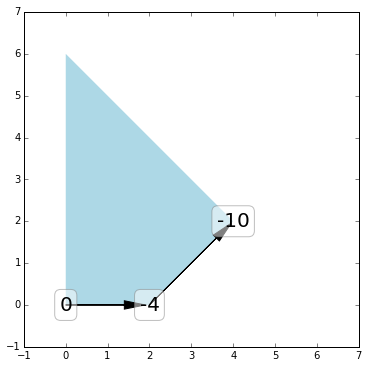

In [175]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

inf = 1000

verts = [ (0, 0), (0, 6), (4, 2), (2, 0), (0,0) ]

codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,]

path = Path(verts, codes)

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
patch = patches.PathPatch(path, facecolor='lightblue', lw=0)
ax.add_patch(patch)
ax.set_xlim(-1,7)
ax.set_ylim(-1,7)

# arrows
ax.arrow(0, 0, 1.4, 0, head_width=0.2, head_length=0.5, fc='k', ec='k')
ax.arrow(2, 0, 1.6, 1.6, head_width=0.2, head_length=0.5, fc='k', ec='k')

# boxes
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
ax.text(0, 0, "0", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 0, "-4", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(4, 2, "-10", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.show()
